In [10]:
import torch
import torch.nn as nn
import load_data
import torchviz

In [12]:
class NeuralNetwork(nn.Module):
    """
    Neurale Network Klasse entsprechend Pytorch. Erbt von nn.module
    """
    def __init__(self):
        """
        Init methode für die klasse. Hier werden verschiedene Layer für das Netzwerk gebaut
        """
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1000 * 1000 * 3, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 10, bias=True),
            nn.ReLU(),
            nn.Linear(10, 4, bias=True)
        )
        self.conv = nn.Sequential(  # Das müsste in etwa unsere idee mit dem 5 kernel abbilden?
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5),
            nn.Flatten()
        )
        self.conv2 = nn.Sequential(
            nn.Linear(396010, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 100, bias=True),
            nn.ReLU(),
            nn.Linear(100, 10, bias=True),
            nn.ReLU(),
            nn.Linear(10, 4, bias=True)
        )

    def forward(self, x):
        """
        Forward methode entsprechend pytorch. Hier entsteht das eigentliche Model
        :param x:
        :return:
        """
        # logits = self.layers(x)
        x = self.conv(x)
        # print(x)
        logits = self.conv2(x)
        return logits

In [13]:
model = NeuralNetwork()
model.load_state_dict(torch.load(r"C:\Users\Emily\Documents\Bachelor_Artefakte\modelle\model.pth",map_location=torch.device('cpu')))
model.eval()

NeuralNetwork(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3000000, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=4, bias=True)
  )
  (conv): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (conv2): Sequential(
    (0): Linear(in_features=396010, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=10, bias

In [3]:
train_dataloader, test_dataloader = load_data.buildLoaders(
    annotations_file=r"C:\Users\Emily\Documents\Bachelor_Artefakte\image_data.csv",
    img_dir=r"C:\Users\Emily\Documents\Bachelor_Drohnen_Bilder\PNG", size=1000,
    color="rgb", batch_size=1)

In [7]:
X = next(iter(test_dataloader))

In [15]:
y = model(X[0])

c:\users\emily\documents\notebooks\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


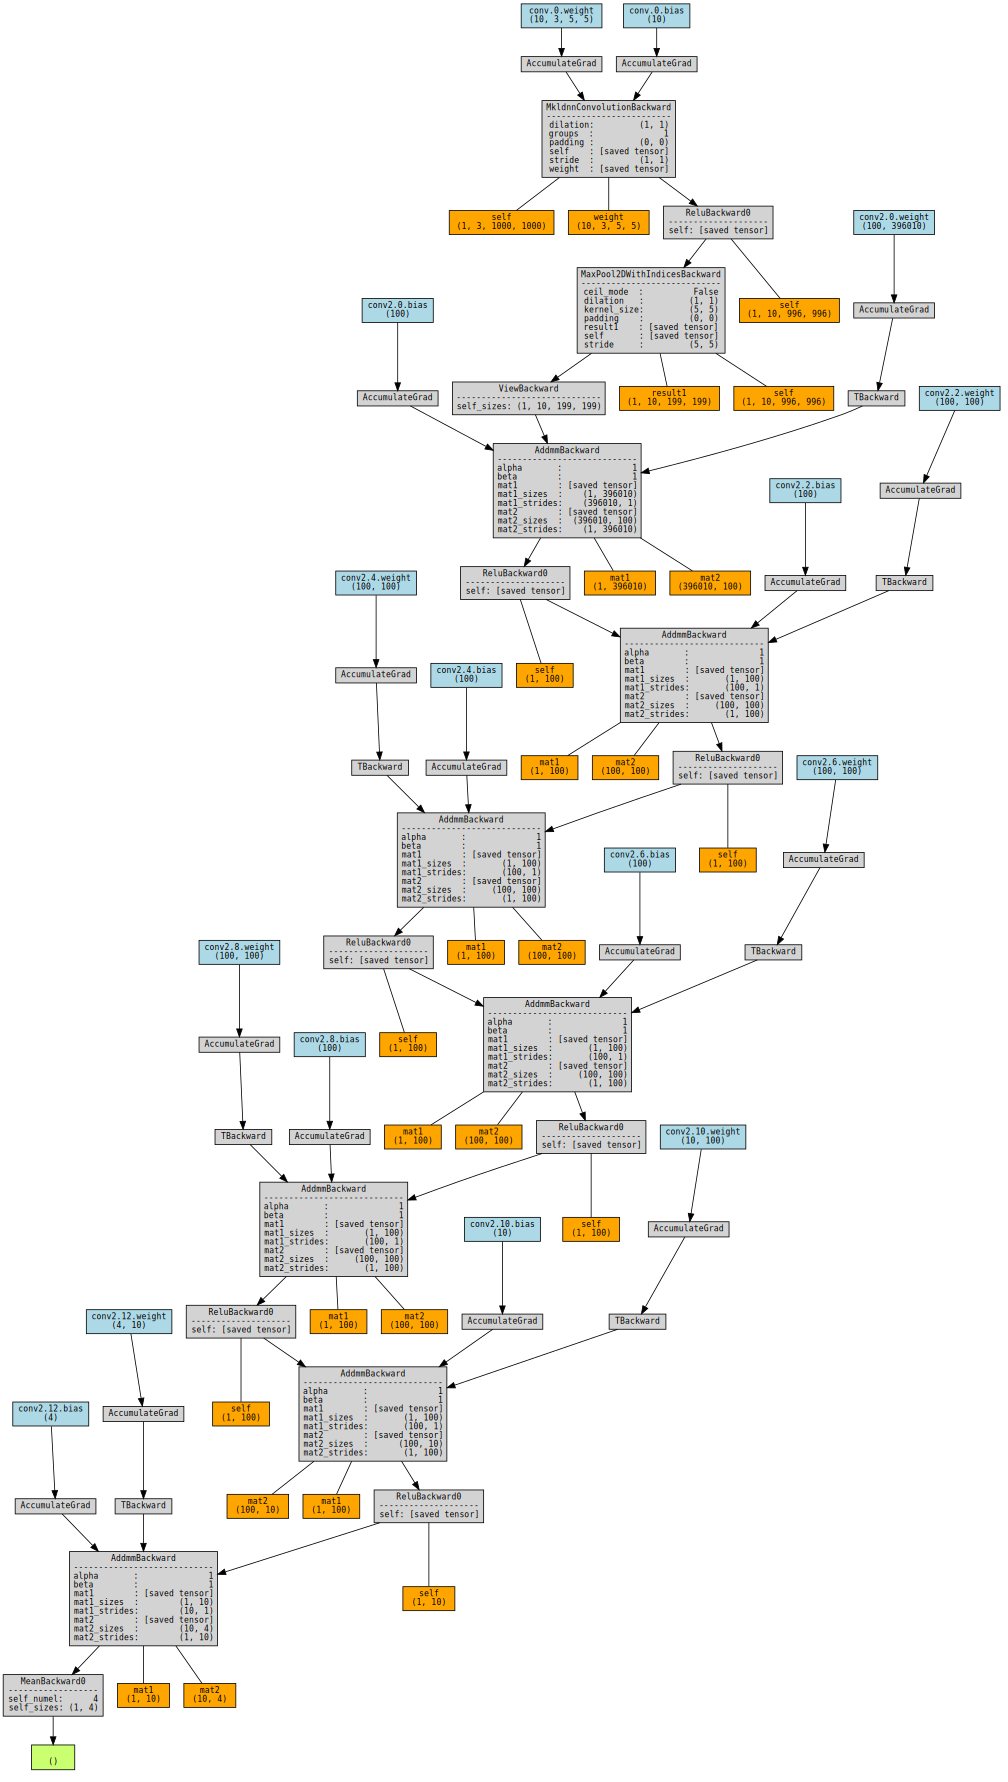

In [18]:
torchviz.make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

In [17]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3000000, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=4, bias=True)
  )
  (conv): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (conv2): Sequential(
    (0): Linear(in_features=396010, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=10, bias